# Statistics for Experimental Physics
## Part II: Bayesian Statistics
### Assessed Problem Sheet 3

**Due: 27 November 2024**  
**Boris Leistedt** - B.LEISTEDT@IMPERIAL.AC.UK

Based on the material originally designed by Alan Heavens

---

## General Guidance

- **Explain your reasoning** but be **concise**
- **For derivations**: Typeset your answer in latex in notebook cells. Highlight the different steps clearly to show your logical progression.
- **For code**: Include clear comments explaining your approach.
- **For figures**: Ensure professional presentation with proper labels and legends.

---

## Problem Statement

An experiment counts $n$ radioactive decays in a fixed time period $T$. Treating these as independent events, formulate this as a Bayesian inference problem with an expected rate $\lambda$ decays per unit time.

**Total: 25 marks**

<div style="border:2px solid #4CAF50; padding:10px; background-color:#f9f9f9;">

**Note: AI Declaration**

AI was used in the following ways in this assignment:  
- formatting my handwriting to LaTeX
- plotting functions (copilot tab complete)
- tables to output values, to format them nicely

</div>


## Part (a) - Bayesian Inference Problem Formulation [5 marks]

Formulate this as a Bayesian inference problem:

i) What are the data?  
ii) What are the parameters?  
iii) What is the likelihood function? (i.e. which well-known distribution, introduced in the frequentist part of the course, describes the sampling distribution of the data? Write down the properly normalised probability distribution.)  
iv) What prior will you choose? *Hints: the parameter(s) may be scale parameters, rather than location parameters. There may be a few possibilities, but this choice will affect the derivation of the posterior distribution.*  
v) Hence write down the posterior. You do not need to normalise it. Check if the resulting probability distribution has a name or belongs to a particular family of distributions.

### Answer (a) in this cell

**i) Data:**  The number of decays $n$ observed in a period of time $T$

**ii) Parameters:** The decay rate $ \lambda $ representing decays per unit time

**iii) Likelihood function:**  Poisson distribution, as it's a discrete probablity distribution function that expresses the probability of a given number of events occuring in a fixed interval of time. \
$P(n \mid \lambda, T) = \frac{(\lambda T)^n \, e^{-\lambda T}}{n!}$\

note - using $\lambda T$ as the Poisson param b/c the expected number of decays at time T would be $\lambda T$  

**iv) Prior choice:** So our lambda can't be negative b/c it's a count and based on the hint it makes sense to use something that's a conjugate to the Poisson dist as it will make the maths later easier.
This gives us the Gamma distribution\
$p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}, \qquad \lambda > 0$

Since I don't have much to go of, I'll choose a uninformative prior with alpha = Beta = 1 \
$p(λ) = e^{-λ}, λ > 0$


**v) Posterior (unnormalized):**  (Doing it all in LaTeX was tedious so just did it in plain text + using symbols directly)\
So by Bayes THM we have Posterior ∝ Likelihood × Prior
- Have our poisson dist from above as P(n | λ, T) = (λT)^n e^(-λT) / n!
- Have our uninformative prior as P(λ) = e^(-λ)
- Multiplying them we get
    - (λT)^n e^(-λT) / n! × e^(-λ)
    - (λT)^n e^(-λT) × e^(-λ)
        - \# we can drop the n! as it's a constant
    - T^n λ^n e^(-λT) e^(-λ)
        - \# seperating the T^n
    - λ^n e^(-λ(T+1))
        - \# combining the expo terms

- We see that what's left has the form of a Gamma distribution
- so: P(λ | n, T) ∝ λ^n e^(-(T+1)λ)
    - \# where α = n + 1 and β = T + 1
- Finally get:
    - P(λ | n, T) ∝ λ^n e^(-(T+1)λ)
        - \# Gamma(n+1, T+1)

## Part (b) - Maximum A Posteriori (MAP) Estimate [3 marks]

What is the most probable (or maximum a posteriori, MAP) value of the parameter? You may find it convenient to work with the log of the posterior rather than the posterior itself. You may also use $\int_0^\infty dx \, x^m \exp(-x) = \Gamma(m + 1)$ and $\Gamma(m + 1)/\Gamma(m) = m$.

To find the MAP, we take the derivative and set it to zero and evaluate from there.\
$\log p(\lambda \mid n, T) = n \ln \lambda - (T+1)\lambda + \text{const}$ \
$\frac{\partial}{\partial \lambda} \log p(\lambda \mid n, T)
= \frac{n}{\lambda} - (T+1)$ = 0\
n/λ = T+1 \
$\lambda_{\mathrm{MAP}} = \frac{n}{T+1}$ \
so given our alpha= beta =1 terms
$ 
\boxed{\lambda_{\mathrm{MAP}} \begin{cases}
\dfrac{n}{T+1}, & n > 0, \\
0, & n = 0.
\end{cases}
}
$

because with the full general formula for Gamma with our terms in we have this \
$\lambda_{\mathrm{MAP}} = \frac{a+n-1}{\beta + T}$



## Part (c) - Posterior Mean [3 marks]

Write down an expression for $\bar{\lambda}$, the posterior mean of $\lambda$ in terms of the posterior, and evaluate it. Pay attention to the normalisation!

So first we want the normalization constant Z, it's gotten by integrating from 0->inf w.r.t lambda \
$Z = \int_0^\infty \lambda^n e^{-(T+1)\lambda}\, d\lambda$ \

We use the hint and integrate using a substitution (have to adjust the term we integrate w.r.t aswell) \
$x = (T+1)\lambda, \qquad \lambda = \frac{x}{T+1}, \qquad d\lambda = \frac{dx}{T+1}$

$Z = \frac{1}{(T+1)^{\,n+1}} \int_0^\infty x^n e^{-x}\, dx= \frac{\Gamma(n+1)}{(T+1)^{\,n+1}}$ \

So the normalized posterior is \
$p(\lambda \mid n, T)= \frac{(T+1)^{\,n+1}}{\Gamma(n+1)} \lambda^n e^{-(T+1)\lambda}, \qquad \lambda > 0$

now we get the mean of it\
$\bar{\lambda}
= \mathbb{E}[\lambda \mid n, T] \
= \int_0^\infty \lambda\, p(\lambda \mid n, T)\, d\lambda
$

plug in\
$\bar{\lambda}
= \frac{(T+1)^{\,n+1}}{\Gamma(n+1)} 
  \int_0^\infty \lambda^{n+1} e^{-(T+1)\lambda}\, d\lambda
$

Evaluate the integral\
$\int_0^\infty \lambda^{n+1} e^{-(T+1)\lambda}\, d\lambda
= \frac{\Gamma(n+2)}{(T+1)^{\,n+2}}$

Combine terms\
$\bar{\lambda}
= \frac{\Gamma(n+2)}{\Gamma(n+1)} \cdot \frac{1}{T+1}$

Use identity from the hint\
$\frac{\Gamma(n+2)}{\Gamma(n+1)} = n+1$

Final lambda bar (mean)\
$\boxed{
\bar{\lambda}
= \frac{n+1}{T+1}
}$

So we see that the posterior mean is slightly higher than the MAP result we found previously






## Part (d) - Posterior Variance [4 marks]

Find an expression for the variance of the posterior. 

From part (a), we found that the posterior is: \
P(λ | n, T) ~ Gamma(n+1, T+1)

So we could either integrate directly using the general formula for variance

Var[λ] = E[λ²] - (E[λ])²

But there is an easier way \
For a Gamma distribution with parameters Gamma(α, β), the variance is:
Var[X] = α/β² \
 (this is a standard formula https://statproofbook.github.io/P/gam-var.html)

Apply to our posterior

Our posterior has parameters:
- α = n + 1
- β = T + 1

Therefore:
Var[λ | n, T] = α/β² = (n+1)/(T+1)²


Final Answer:

$$\boxed{\text{Var}[\lambda] = \frac{n+1}{(T+1)^2}}$$

Makes sense because the variance decreases as T increases, which follows our expectation that more observations would reduce variance, given that our methodology isn't faulty. The variance also increases with n, more decays being observed would mean that the true ratre could be higher, so we're more uncertain.

## Part (e) - Simulation-Based Validation [15 marks]

An experiment observes $n = 70$ decays in $T = 100$ seconds. You will now validate your analytical results using a simulation approach, and explore a powerful computational method for Bayesian inference.

### Part (e)(i) - Simulating the Data Generation Process [5 marks]

You will now simulate the data generation process many times to build up an approximation to the posterior distribution.

Write a computer program that:

1. Draws a random value of $\lambda$ from your chosen prior distribution
2. Uses this $\lambda$ to simulate a radioactive decay experiment: draw the number of decays $n$ that would be observed in time $T = 100$ seconds from the appropriate probability distribution
3. Records both the simulated $\lambda$ and the simulated $n$
4. Repeats steps 1-3 many times (start with at least 10,000 simulations; you may need significantly more). Store the result.

Make a figure to prove that you drew from the correct distribution of $\lambda$ (as calculated analytically).

**Your code should:**
- Be well-commented to explain the key steps
- Use appropriate random number generators and tabulated probability distributions (check `scipy.stats`)

Running simulations for different sample sizes...

Running 10000 simulations...
Lambda range: [0.000, 8.543]
n range: [0, 854]
Lambda mean: 0.995, std: 1.008

Running 50000 simulations...
Lambda range: [0.000, 11.453]
n range: [0, 1176]
Lambda mean: 1.002, std: 0.999

Running 100000 simulations...
Lambda range: [0.000, 12.131]
n range: [0, 1217]
Lambda mean: 1.000, std: 1.000

Running 500000 simulations...
Lambda range: [0.000, 13.067]
n range: [0, 1336]
Lambda mean: 1.001, std: 1.003

Running 1000000 simulations...
Lambda range: [0.000, 13.838]
n range: [0, 1402]
Lambda mean: 1.001, std: 1.000

Creating validation plot for n_simulations = 1000000


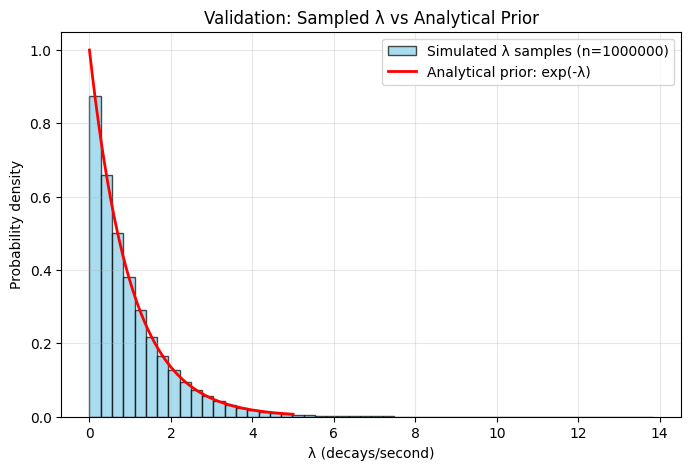


SUMMARY OF ALL SIMULATION RUNS:
Simulations  Mean     Std      Error Mean   Error Std   
------------------------------------------------------------
10000        0.995    1.008    0.0051       0.0078      
50000        1.002    0.999    0.0019       0.0012      
100000       1.000    1.000    0.0000       0.0002      
500000       1.001    1.003    0.0012       0.0026      
1000000      1.001    1.000    0.0009       0.0001      

All results stored in 'all_results' dictionary for parts (ii) and (iii)
Access results using: all_results[n_simulations]['lambda_samples']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
T = 100  # Time period (seconds)
n_simulation_sizes = [10000, 50000, 100000, 500000, 1000000]  # Different simulation sizes to test

# Dictionary to store all results
all_results = {}

print("Running simulations for different sample sizes...")

for n_simulations in n_simulation_sizes:
    print(f"\nRunning {n_simulations} simulations...")
    
    # Set up storage for results
    lambda_samples = []
    n_samples = []
    
    # Run the simulation loop
    for i in range(n_simulations):
        # Draw a random λ from the prior distribution
        # Prior: Exponential(rate=1) which is equivalent to Gamma(1,1)
        lambda_sim = stats.expon.rvs(scale=1)
        
        # Use this λ to simulate radioactive decay experiment
        # Draw from Poisson(λT) distribution
        n_sim = stats.poisson.rvs(mu=lambda_sim * T)
        
        # Store the results
        lambda_samples.append(lambda_sim)
        n_samples.append(n_sim)
    
    # Convert to numpy arrays
    lambda_samples = np.array(lambda_samples)
    n_samples = np.array(n_samples)
    
    # Store results in dictionary
    all_results[n_simulations] = {
        'lambda_samples': lambda_samples,
        'n_samples': n_samples,
        'lambda_mean': lambda_samples.mean(),
        'lambda_std': lambda_samples.std()
    }
    
    print(f"Lambda range: [{lambda_samples.min():.3f}, {lambda_samples.max():.3f}]")
    print(f"n range: [{n_samples.min()}, {n_samples.max()}]")
    print(f"Lambda mean: {lambda_samples.mean():.3f}, std: {lambda_samples.std():.3f}")

# Plot validation for the largest sample size only (dont want to litter notebook with multiple plots)
largest_n = max(n_simulation_sizes)
lambda_samples = all_results[largest_n]['lambda_samples']

print(f"\nCreating validation plot for n_simulations = {largest_n}")

# Prove we drew from correct prior distribution by plotting histogram of samples overlayed with the analytical prior
plt.figure(figsize=(8, 5))

# Histogram of sampled λ values
plt.hist(lambda_samples, bins=50, density=True, alpha=0.7, 
         color='blue', edgecolor='black', label=f'Simulated λ samples (n={largest_n})')

# Overlay analytical prior: p(λ) = exp(-λ)
lambda_range = np.linspace(0, 5, 1000)
prior_theory = stats.expon.pdf(lambda_range, scale=1)
plt.plot(lambda_range, prior_theory, 'r-', linewidth=2, 
         label='Analytical prior: exp(-λ)')

plt.xlabel('λ (decays/second)')
plt.ylabel('Probability density')
plt.title('Validation: Sampled λ vs Analytical Prior')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Summary statistics for all runs
print(f"\n{'='*60}")
print("SUMMARY OF ALL SIMULATION RUNS:")
print(f"{'='*60}")
print(f"{'Simulations':<12} {'Mean':<8} {'Std':<8} {'Error Mean':<12} {'Error Std':<12}")
print("-" * 60)

for n_sim in n_simulation_sizes:
    result = all_results[n_sim]
    error_mean = abs(result['lambda_mean'] - 1.0)
    error_std = abs(result['lambda_std'] - 1.0)
    print(f"{n_sim:<12} {result['lambda_mean']:<8.3f} {result['lambda_std']:<8.3f} {error_mean:<12.4f} {error_std:<12.4f}")

print(f"\nAll results stored in 'all_results' dictionary for parts (ii) and (iii)")
print(f"Access results using: all_results[n_simulations]['lambda_samples']")

So our means and s.t.d seem to converge to 1 which is what the theoretical value should also be. Further the errors decrease with larger samples. So all this is as we would hope and expect.

The plot also validates that we are infact correctly sampling for the prior we calculated in the previous steps. This is because the plots overlap each other almost perfectly

### Part (e)(ii) - Mimicking the observed data at hand [5 marks]

From all your simulations, **keep only those cases where the simulated data exactly matches the observed data** ($n = 70$). For these matching simulations, save the corresponding $\lambda$ values. 

The fraction of matching simulations will be small (typically ~0.5-1%), so you need many total simulations to get enough matching cases. Aim for a few hundred matching simulations for a good approximation If you get too few matches, increase the total number of simulations and run again.

Report the total number of simulations, and the number of simulations kept.

In [ ]:
# Observed experimental data
observed_n = 70
T = 100

# We'll use the largest simulation run for best statistics
largest_simulation = max(all_results.keys())
lambda_all = all_results[largest_simulation]['lambda_samples']
n_all = all_results[largest_simulation]['n_samples']

print(f"Using simulation with {largest_simulation} total samples")

# Filter to keep only cases where simulated n matches observed n = 70
matching_mask = (n_all == observed_n)
lambda_matches = lambda_all[matching_mask]

# Report results
n_total = len(n_all)
n_matches = len(lambda_matches) #a list of all lambda values where n=70
match_fraction = n_matches / n_total

print(f"Simulations matching n = {observed_n}: {n_matches}")
print(f"Match fraction: {match_fraction:.3f} ({match_fraction*100:.1f}%)")

# Store for part (iii)
posterior_samples = lambda_matches
print(f"\nλ samples for posterior approximation stored.")
print(f"Range of matching λ values: [{lambda_matches.min():.3f}, {lambda_matches.max():.3f}]")
print(f"Mean of matching λ values: {lambda_matches.mean():.3f}")

Using simulation with 1000000 total samples
Simulations matching n = 70: 4986
Match fraction: 0.005 (0.5%)

λ samples for posterior approximation stored.
Range of matching λ values: [0.435, 1.038]
Mean of matching λ values: 0.705


So with our largest sample of a million events we got 4986 cases of lambda that had n=70. Which is a good amount to do our approximation of the posterior.

### Part (e)(iii) - Comparing Simulation with Analytical Posterior [5 marks]

The distribution of $\lambda$ values from the simulations that matched the observed data ($n = 70$) should approximate the posterior distribution $p(\lambda | n=70, T=100)$.

Create a **single, publication-quality figure** that compares the analytical posterior curve you built in exercise (a) with an approximation for it based on the set of samples of $\lambda$ matching the observed data $n=70$ (part e ii). Also show your prior (either from an analytic formula, or using the samples you drew). These two curves should be on top of each other. Make sure the visualization is clear and relevant (including the choice of axis limits, labels, units, legend, colors, readable fonts, etc).  

If your histogram and analytical curve don't overlap well, this indicates a problem. Possible causes:
- Too few matching simulations (go back and run more)
- Incorrect analytical posterior formula
- Issue with the processing of the simulation samples or their visualization

Analytical posterior: Gamma(71, 101)
Analytical mean: 0.703
Analytical std: 0.083
Simulated mean: 0.705
Simulated std: 0.083


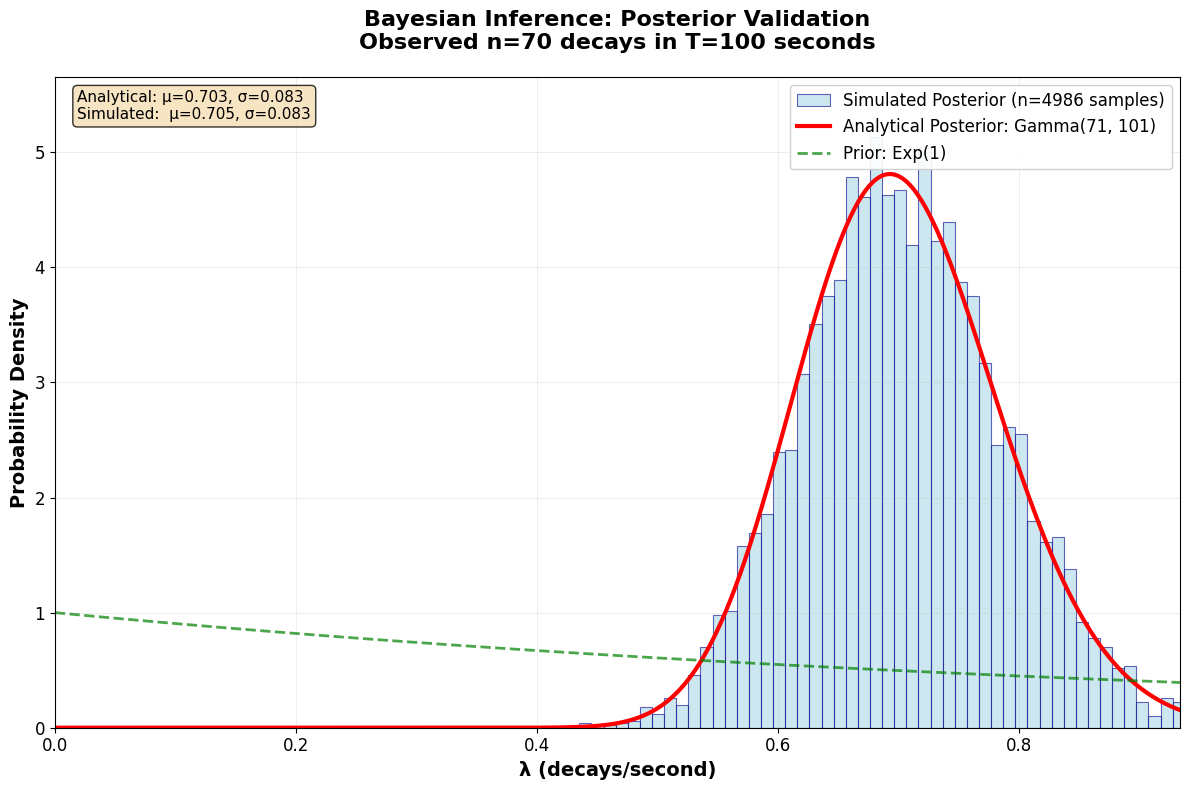


QUANTITATIVE COMPARISON:
Metric               Analytical   Simulated    Error       
------------------------------------------------------------
Mean                 0.7030       0.7049       0.0019      
Std Dev              0.0834       0.0832       0.0002      


In [10]:
# Part (e)(iii)
# Observed data
observed_n = 70
T = 100

# Calculate analytical posterior parameters
# From part (a): Posterior ~ Gamma(n+1, T+1)
alpha_posterior = observed_n + 1  # 71
beta_posterior = T + 1            # 101

# Calculate analytical values for comparison
analytical_mean = alpha_posterior / beta_posterior
analytical_std = np.sqrt(alpha_posterior) / beta_posterior

print(f"Analytical posterior: Gamma({alpha_posterior}, {beta_posterior})")
print(f"Analytical mean: {analytical_mean:.3f}")
print(f"Analytical std: {analytical_std:.3f}")
print(f"Simulated mean: {posterior_samples.mean():.3f}")
print(f"Simulated std: {posterior_samples.std():.3f}")

# Create figure
plt.figure(figsize=(12, 8))

# Define lambda range for plotting
lambda_max = np.percentile(posterior_samples, 99.5)  # Cut off outliers
lambda_range = np.linspace(0, lambda_max, 1000)

# Simulated posterior (histogram of lambda values where n=70)
plt.hist(posterior_samples, bins=60, density=True, alpha=0.6, 
         color='lightblue', edgecolor='darkblue', linewidth=0.8,
         label=f'Simulated Posterior (n={len(posterior_samples)} samples)')

# Analytical posterior
posterior_analytical = stats.gamma.pdf(lambda_range, alpha_posterior, scale=1/beta_posterior)
plt.plot(lambda_range, posterior_analytical, 'r-', linewidth=3, 
         label=f'Analytical Posterior: Gamma({alpha_posterior}, {beta_posterior})')

# Prior for reference
prior_analytical = stats.expon.pdf(lambda_range, scale=1)
plt.plot(lambda_range, prior_analytical, 'g--', linewidth=2, alpha=0.7,
         label='Prior: Exp(1)')

# Formatting to make quality better
plt.xlabel('λ (decays/second)', fontsize=14, fontweight='bold')
plt.ylabel('Probability Density', fontsize=14, fontweight='bold')
plt.title('Bayesian Inference: Posterior Validation\nObserved n=70 decays in T=100 seconds', 
          fontsize=16, fontweight='bold', pad=20)

# Legend and grid
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Set axis limits
plt.xlim(0, lambda_max)
plt.ylim(0, plt.ylim()[1] * 1.05)

# Add text box with key statistics
textstr = f'Analytical: μ={analytical_mean:.3f}, σ={analytical_std:.3f}\n'
textstr += f'Simulated:  μ={posterior_samples.mean():.3f}, σ={posterior_samples.std():.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

# Improve tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tight layout for better appearance
plt.tight_layout()
plt.show()

# Quantitative comparison
print(f"\n{'='*60}")
print("QUANTITATIVE COMPARISON:")
print(f"{'='*60}")
print(f"{'Metric':<20} {'Analytical':<12} {'Simulated':<12} {'Error':<12}")
print("-" * 60)
mean_error = abs(posterior_samples.mean() - analytical_mean)
std_error = abs(posterior_samples.std() - analytical_std)
print(f"{'Mean':<20} {analytical_mean:<12.4f} {posterior_samples.mean():<12.4f} {mean_error:<12.4f}")
print(f"{'Std Dev':<20} {analytical_std:<12.4f} {posterior_samples.std():<12.4f} {std_error:<12.4f}")

So as seen above our histogram and analytical curve overlap well. This is further reinforced by the quantatative comparison which also reveals our findings to match the analytical expectations.